In [1]:
import sys
sys.path.append('../')
import torch.optim as optim
from dataset import *
from model import *
import torch.nn.init as init
from sklearn.preprocessing import MinMaxScaler
from torch.utils.tensorboard import SummaryWriter

Train_epoch:0    MAE:101.1274758972168   Pure:101.1274758972168
Train_epoch:10    MAE:6.303707934570313   Pure:6.303707934570313
Test_epoch:10    MAE_test:13.581088346414292


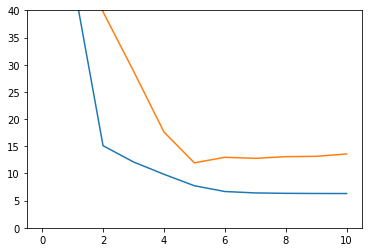

Train_epoch:20    MAE:6.248626475906372   Pure:6.248626475906372
Test_epoch:20    MAE_test:13.335972856028011


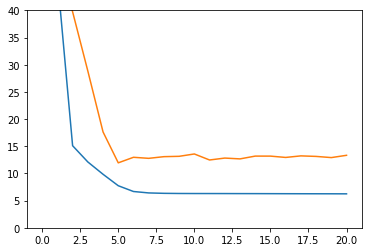

Train_epoch:30    MAE:6.157683232498169   Pure:6.157683232498169
Test_epoch:30    MAE_test:12.633343142061568


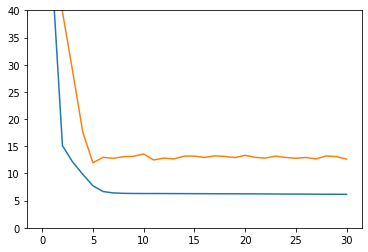

Train_epoch:40    MAE:6.103225840759277   Pure:6.103225840759277
Test_epoch:40    MAE_test:13.596160385936212


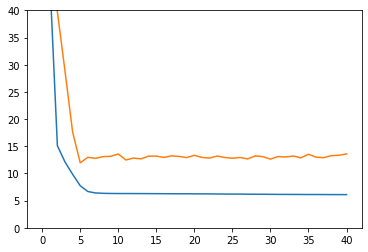

Train_epoch:50    MAE:6.084663386917114   Pure:6.084663386917114
Test_epoch:50    MAE_test:13.354287863539431


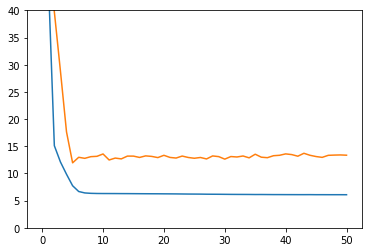

Train_epoch:60    MAE:6.072837893676758   Pure:6.072837893676758
Test_epoch:60    MAE_test:13.817373336694493


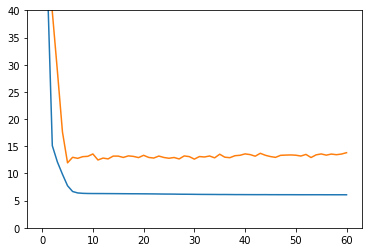

Train_epoch:70    MAE:6.070719891357422   Pure:6.070719891357422
Test_epoch:70    MAE_test:13.57215179041171


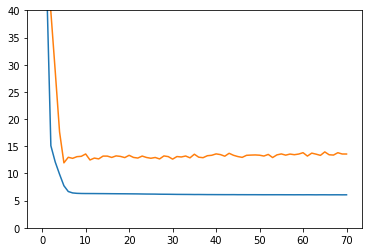

Train_epoch:80    MAE:6.0625505474090575   Pure:6.0625505474090575
Test_epoch:80    MAE_test:13.382707254574322


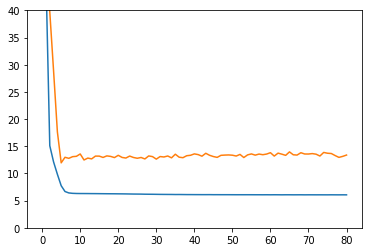

Train_epoch:90    MAE:6.06406544380188   Pure:6.06406544380188
Test_epoch:90    MAE_test:13.534946356337672


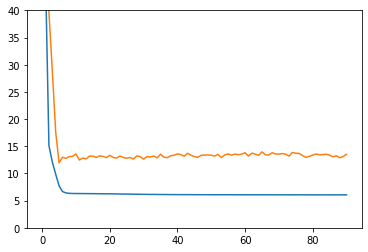

Train_epoch:100    MAE:6.060575653076172   Pure:6.060575653076172
Test_epoch:100    MAE_test:14.015591903235585


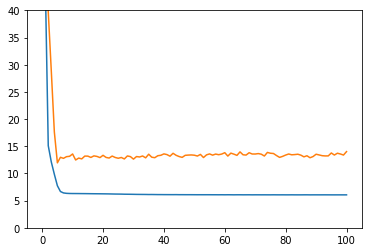

Train_epoch:110    MAE:6.0592552780151365   Pure:6.0592552780151365
Test_epoch:110    MAE_test:13.761654316045986


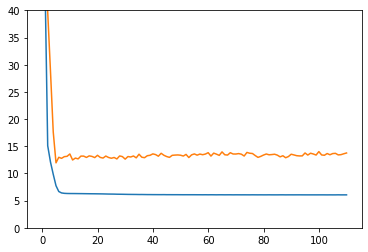

Train_epoch:120    MAE:6.057893772506714   Pure:6.057893772506714
Test_epoch:120    MAE_test:13.2354170263004


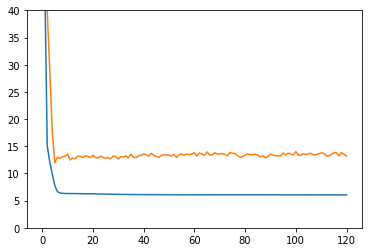

Train_epoch:130    MAE:6.0595913562774655   Pure:6.0595913562774655
Test_epoch:130    MAE_test:13.473656364904045


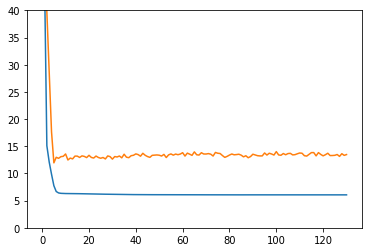

Train_epoch:140    MAE:6.05448857460022   Pure:6.05448857460022
Test_epoch:140    MAE_test:13.286399628026798


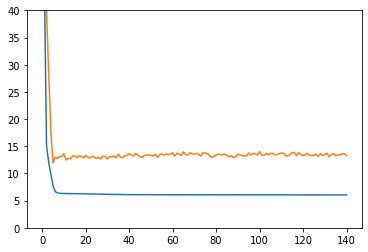

Train_epoch:150    MAE:6.056063317871094   Pure:6.056063317871094
Test_epoch:150    MAE_test:13.834882303548698


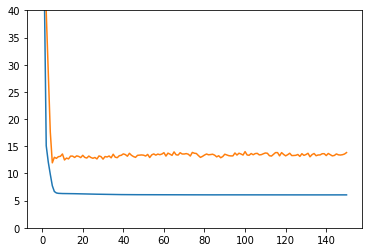

Train_epoch:160    MAE:6.052987287521362   Pure:6.052987287521362
Test_epoch:160    MAE_test:13.345719887425725


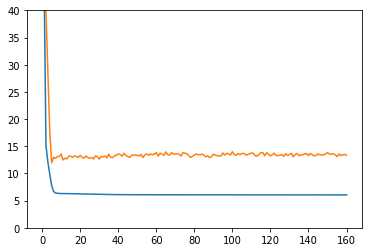

Train_epoch:170    MAE:6.051577904891968   Pure:6.051577904891968
Test_epoch:170    MAE_test:13.553373588159824


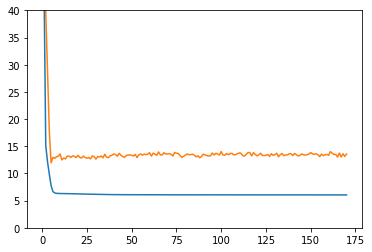

Train_epoch:180    MAE:6.054832816314697   Pure:6.054832816314697
Test_epoch:180    MAE_test:13.553261191700214


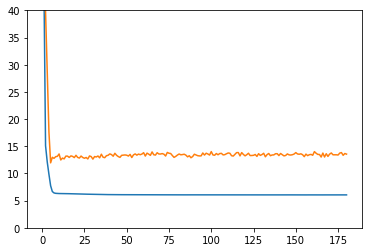

Train_epoch:190    MAE:6.0499751701354985   Pure:6.0499751701354985
Test_epoch:190    MAE_test:13.708676825697049


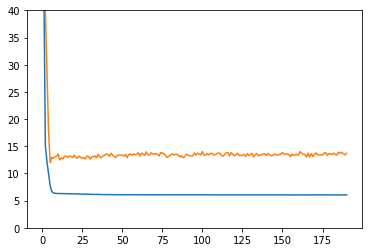

Train_epoch:200    MAE:6.051892987060547   Pure:6.051892987060547
Test_epoch:200    MAE_test:13.617112659417783


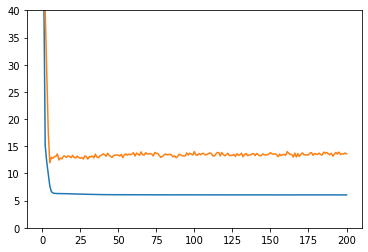

Train_epoch:210    MAE:6.0491103759765625   Pure:6.0491103759765625
Test_epoch:210    MAE_test:13.859270054692278


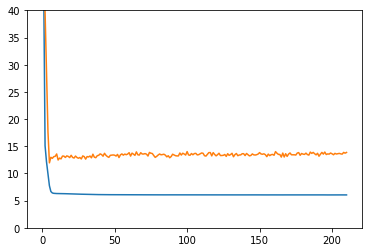

Train_epoch:220    MAE:6.0502721893310545   Pure:6.0502721893310545
Test_epoch:220    MAE_test:13.565485591705615


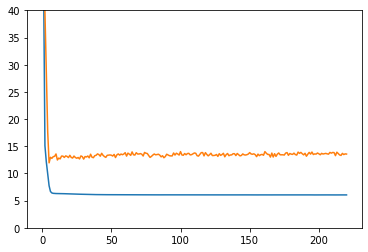

Train_epoch:230    MAE:6.050555948257446   Pure:6.050555948257446
Test_epoch:230    MAE_test:13.555039527698066


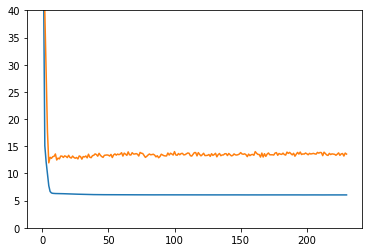

Train_epoch:240    MAE:6.050650233459472   Pure:6.050650233459472
Test_epoch:240    MAE_test:13.254182428597643


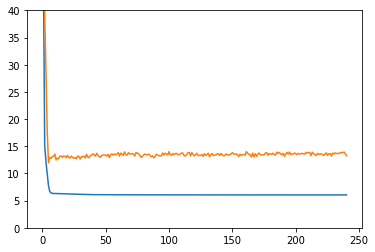

Train_epoch:250    MAE:6.046183052444458   Pure:6.046183052444458
Test_epoch:250    MAE_test:13.673821339592005


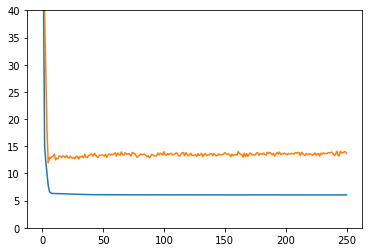

Train_epoch:260    MAE:6.051562678909302   Pure:6.051562678909302
Test_epoch:260    MAE_test:13.104422800837995


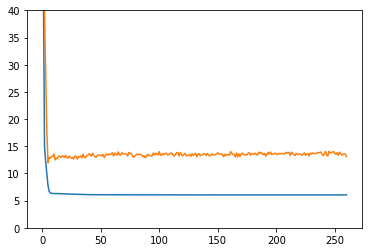

Train_epoch:270    MAE:6.049760480880737   Pure:6.049760480880737
Test_epoch:270    MAE_test:13.560143758694585


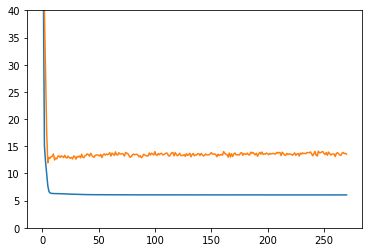

Train_epoch:280    MAE:6.050671481704712   Pure:6.050671481704712
Test_epoch:280    MAE_test:13.726445059425915


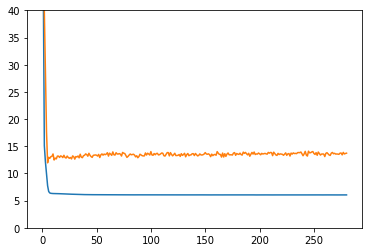

Train_epoch:290    MAE:6.049675440979004   Pure:6.049675440979004
Test_epoch:290    MAE_test:13.974889901499397


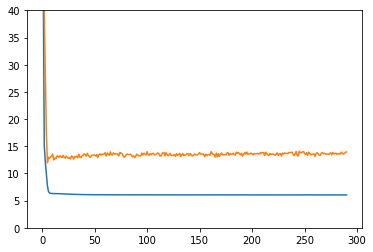

Train_epoch:300    MAE:6.052455410385132   Pure:6.052455410385132
Test_epoch:300    MAE_test:13.492162419584231


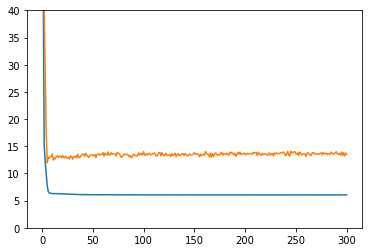

Train_epoch:310    MAE:6.053105920791626   Pure:6.053105920791626
Test_epoch:310    MAE_test:13.916667752372572


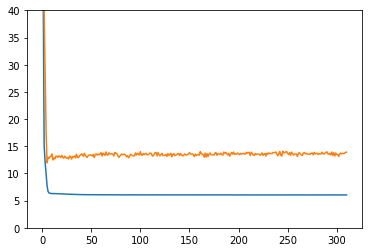

Train_epoch:320    MAE:6.0537670150756835   Pure:6.0537670150756835
Test_epoch:320    MAE_test:13.702482878590544


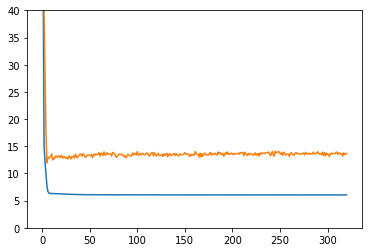

Train_epoch:330    MAE:6.045615119934082   Pure:6.045615119934082
Test_epoch:330    MAE_test:13.552412482496267


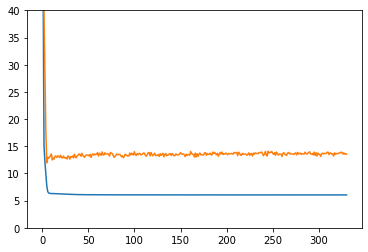

In [ ]:
s_or_d = "s"
unrelated_feature_number = 0
feature_number = 3

train_log = np.array([])
val_log = np.array([])
test_log = np.array([])

# writer = {
#     'train': SummaryWriter('../logs/OTO/train'), #必须要不同的writer
#     'test': SummaryWriter('../logs/OTO/test'),
# }

batchsize = 32
lambda_l1 = 0  # 正则化系数
lambda_selection = 0

criterion = nn.L1Loss()
criterion = criterion.cuda()

model = MLP(feature_number).cuda()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# adaptive learning rate
# scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma = 0.98)


# tmp = np.load("../data/simu_20000_0.1_90_140_train.npy")
# if s_or_d == 0:
#     max = np.max(tmp[:, 1004])
#     min = np.min(tmp[:, 1004])
# else:
#     max = np.max(tmp[:, 1005])
#     min = np.min(tmp[:, 1005])


train_dataset = Dataset("../data/features_rand_train_90_115.npy", s_or_d, "train", unrelated_feature_number)
train_loader = DataLoader(train_dataset, batch_size=batchsize, shuffle=True,drop_last=True)

val_dataset = Dataset("../data/features_rand_validate_116_140.npy", s_or_d, "test", unrelated_feature_number)
val_loader = DataLoader(test_dataset, batch_size=batchsize, shuffle=True,drop_last=True)

test_dataset = Dataset("../data/features_rand_test.npy", s_or_d, "test", unrelated_feature_number)
test_loader = DataLoader(test_dataset, batch_size=batchsize, shuffle=True,drop_last=True)


for epoch in range(501):
    
    # print(f"Learning Rate (Single LR): {optimizer.param_groups[0]['lr']}")
    
    model.train()

    loss_total = 0
    step = 0
    loss_pure = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.cuda(), target.cuda()

        # print(data.shape)

        # target = (target - min) / (max - min)

        output = model(data)

        loss = criterion(output, target)
        
        loss_pure = loss_pure + loss.item()
        
        l1_regularization = torch.tensor(0.0).cuda()
        l1_selection = torch.tensor(0.0).cuda()
        
        for param in model.seq.parameters():
            l1_regularization += torch.norm(param, p=1)
        
        # for param in model.OneToOneLayer.parameters():
        #     l1_selection += torch.norm(param, p=1)
        
        loss = loss + l1_regularization * lambda_l1 + l1_selection * lambda_selection

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_total = loss_total + loss.item()
        step = step + 1
    
    # scheduler.step()
    
    # writer["train"].add_scalar('FS', loss_total/step, epoch)  
    train_log = np.append(train_log, loss_total/step)
    
    # tmp = '../pth/tmp_%d_%.2f.pth' % (epoch, loss_total/step)
    
    if epoch % 10 == 0:
        # torch.save(model, tmp)
        print("Train_epoch:" + str(epoch) + "    MAE:" + str(loss_total/step) + "   Pure:" + str(loss_pure/step))

    loss_test = 0
    step = 0
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(test_loader):
            data, target = data.cuda(), target.cuda()
            output = model(data)

            # inv_norm
            # output = output * (max - min) + min

            loss = criterion(output, target)

            loss_test += loss.item()
            step += 1

        loss_mean = loss_test / step
        
        # writer["test"].add_scalar('FS', loss_mean, epoch) 
        test_log = np.append(test_log, loss_mean)
        
        if epoch % 10 == 0 and epoch != 0:
            print("Test_epoch:" + str(epoch) + "    MAE_test:" + str(loss_mean))
            # tmp_epoch = np.arange(epoch+1)
            # print(tmp_epoch)
            plt.plot(train_log)
            plt.plot(test_log)
            plt.ylim(0,40)
            plt.show()
            
# writer["train"].close()
# writer["test"].close()